In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
from Modules.Exposure_Report import Exposure
import numpy as np
import matplotlib.pyplot as plt
import Modules.Useful_Functions as u
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
import Modules.DataHub as da
from FileFinder import FileFinder as ff
from itertools import combinations

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')


features = da.available_macro_data

features

In [36]:


feature_combinations = list(combinations(features, 2))


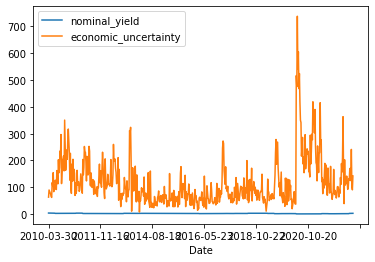

In [57]:


features = ['nominal_yield', 'economic_uncertainty']

sector_df = da.get_Dataset('sec', features, "default")

#sector_df['feature_spread'] = sector_df[features[0]] - sector_df[features[1]]
#features.append('feature_spread')
sector_df[features].plot()

# , "sp_500"
exposure = Exposure(sector_df, 252, 163, features, "sp_500")



In [77]:


bruh = exposure.forward_returns_monthly.copy()
bruh['difference'] = bruh[f'{features[0]}_scores'] - bruh[f'{features[1]}_scores']
#bruh.plot.scatter('difference', 'Consumer Discretionary')

bruh.corr()


#bruh.plot.scatter('inflation_scores', 'Telecomm')

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,nominal_yield_scores,economic_uncertainty_scores,difference
Materials,1.000000,0.073961,-0.593538,-0.006085,-0.579923,-0.154468,0.151783,0.366570,0.386196,0.430916,0.272110,0.489213,-0.208162,0.585963
Industrials,0.073961,1.000000,-0.352479,0.766214,0.507969,0.871998,-0.877867,-0.652722,0.572512,0.627375,0.900309,-0.467101,-0.459565,-0.244320
Consumer Discretionary,-0.593538,-0.352479,1.000000,-0.138360,0.464223,-0.269513,0.027051,0.036392,-0.746387,-0.557784,-0.579033,0.032062,0.454122,-0.185531
Consumer Staples,-0.006085,0.766214,-0.138360,1.000000,0.689375,0.533754,-0.838032,-0.352803,0.508306,0.773087,0.609463,-0.110177,-0.248472,0.009428
Health Care,-0.579923,0.507969,0.464223,0.689375,1.000000,0.520852,-0.787155,-0.423760,-0.141179,0.259651,0.194495,-0.301930,0.048477,-0.323345
Financials,-0.154468,0.871998,-0.269513,0.533754,0.520852,1.000000,-0.810721,-0.687437,0.316099,0.449656,0.755636,-0.570953,-0.428153,-0.362593
Technology,0.151783,-0.877867,0.027051,-0.838032,-0.787155,-0.810721,1.000000,0.459440,-0.231113,-0.622162,-0.699474,0.324028,0.262757,0.196315
Telecomm,0.366570,-0.652722,0.036392,-0.352803,-0.423760,-0.687437,0.459440,1.000000,-0.416711,-0.001856,-0.547961,0.791343,0.306372,0.639975
Utilities,0.386196,0.572512,-0.746387,0.508306,-0.141179,0.316099,-0.231113,-0.416711,1.000000,0.584682,0.683502,-0.199516,-0.523716,0.052388
Real Estate,0.430916,0.627375,-0.557784,0.773087,0.259651,0.449656,-0.622162,-0.001856,0.584682,1.000000,0.629152,0.216985,-0.318042,0.367953


In [72]:


combo_df = exposure.mean_return_combo_monthly.copy()
combo_df['distance'] = [abs(i[0] - i[1]) for i in combo_df.index ]
combo_df['difference'] = [i[0] - i[1] for i in combo_df.index ]
combo_df['meann'] = [ (i[0] + i[1])/2 for i in combo_df.index ]
combo_df.corr()



,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,distance,difference,meann
Materials,1.000000,-0.086138,-0.382517,-0.060248,-0.559979,-0.048183,-0.121497,0.780333,-0.306567,0.654635,0.162622,0.701048,0.891113,0.375096
Industrials,-0.086138,1.000000,-0.682626,0.817637,0.647233,0.932868,-0.932967,-0.543981,0.798651,0.564254,0.961873,-0.137176,-0.269956,-0.792773
Consumer Discretionary,-0.382517,-0.682626,1.000000,-0.384696,0.058444,-0.757546,0.661611,0.022169,-0.486080,-0.715920,-0.802825,-0.337598,-0.127595,0.545249
Consumer Staples,-0.060248,0.817637,-0.384696,1.000000,0.757156,0.598635,-0.834278,-0.346033,0.791898,0.633988,0.734433,-0.193975,-0.021102,-0.385839
Health Care,-0.559979,0.647233,0.058444,0.757156,1.000000,0.499631,-0.613185,-0.669573,0.574365,0.098195,0.448717,-0.425891,-0.502091,-0.449669
Financials,-0.048183,0.932868,-0.757546,0.598635,0.499631,1.000000,-0.886362,-0.484065,0.608125,0.522494,0.925178,0.018449,-0.291767,-0.820738
Technology,-0.121497,-0.932967,0.661611,-0.834278,-0.613185,-0.886362,1.000000,0.265054,-0.602026,-0.745080,-0.931003,-0.052232,0.032738,0.570827
Telecomm,0.780333,-0.543981,0.022169,-0.346033,-0.669573,-0.484065,0.265054,1.000000,-0.661369,0.342036,-0.357545,0.611650,0.846739,0.787719
Utilities,-0.306567,0.798651,-0.486080,0.791898,0.574365,0.608125,-0.602026,-0.661369,1.000000,0.328591,0.694759,-0.407796,-0.318842,-0.675802
Real Estate,0.654635,0.564254,-0.715920,0.633988,0.098195,0.522494,-0.745080,0.342036,0.328591,1.000000,0.683717,0.482165,0.594496,-0.055502


In [81]:

bruh[['nominal_yield_scores', 'economic_uncertainty_scores', 'difference']].loc[ bruh.difference == 2 ] 


,nominal_yield_scores,economic_uncertainty_scores,difference
Date,,,
2013-08-23,1.0,-1.0,2.0
2013-08-26,1.0,-1.0,2.0
2013-08-27,1.0,-1.0,2.0
2013-08-28,1.0,-1.0,2.0
2013-08-29,1.0,-1.0,2.0
2013-08-30,1.0,-1.0,2.0
2013-10-15,1.0,-1.0,2.0
2013-10-16,1.0,-1.0,2.0
2013-10-17,1.0,-1.0,2.0


In [85]:
import plotly.express as px

#bruh.plot.scatter("difference", "Energy")

# pd.to_datetime(bruh.index).year
px.scatter(bruh, x = 'difference', y = 'Telecomm', color = 'nominal_yield_scores', hover_data=[bruh.index])




<AxesSubplot:xlabel='difference', ylabel='Telecomm'>

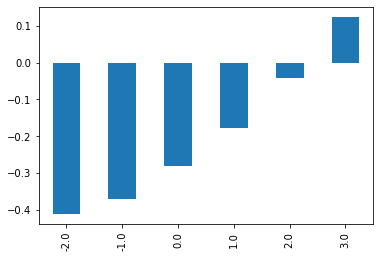

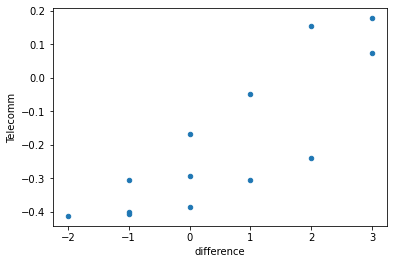

In [86]:


avg_dist = pd.DataFrame({i : combo_df.loc[ combo_df.distance == i].mean() for i in combo_df.distance.sort_values().unique()})
avg_dist = avg_dist.T

avg_diff = pd.DataFrame({i : combo_df.loc[ combo_df.difference == i].mean() for i in combo_df.difference.sort_values().unique()})
avg_diff = avg_diff.T

mean_diff = pd.DataFrame({i : combo_df.loc[ combo_df.meann == i].mean() for i in combo_df.meann.sort_values().unique()})
mean_diff = mean_diff.T

#plt.bar(avg_diff.index, avg_diff['Utilities'])
#plt.xlabel("Difference Between Real Yield Score and Yield Curve Score")


avg_diff["Telecomm"].plot.bar()

combo_df.plot.scatter("difference", 'Telecomm')


<AxesSubplot:>

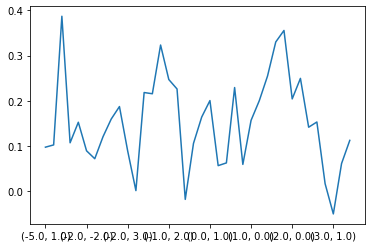

In [91]:


combo_df['Technology'].plot()
